# **Working memory training**: behavioral progress during training sessions

The code below allows to visualize and analize data from 6-week working memory training study. Participants performed 18 sessions of dual n-back training (Jaeggi et al., 2008). Each session consisted of 20 runs of the task. The level of *n* increased with at least 80% correct trials in previous run.

**Last edited:** 11-01-2019


Step 0: Setup
--------------------------------------

In [2]:
# Loading packages
library(psych)
library(tidyverse)
library(data.table)
library(nlme)
library(broom)

# Customizing theme for plotting
theme_training <- theme_bw() + theme(axis.text.y = element_text(size=25, colour='#262626ff'),
          axis.text.x = element_text(size=25, colour='#262626ff'),
          axis.title.y = element_text(size=25, colour='#262626ff'),
          axis.title.x  = element_text(size=25, colour='#262626ff'),
          plot.title = element_text(hjust=0.5, size=25),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour="#262626ff"),
          panel.border = element_rect(colour = "#262626ff", fill=NA, size=1.8),
          panel.background = element_rect(fill="transparent",colour=NA),
          plot.background = element_rect(fill="transparent",colour=NA),
          legend.key = element_rect(fill= "transparent", colour="transparent"),
          strip.background = element_rect(fill="transparent", colour=NA),
          strip.text = element_text(size=25),
          axis.ticks = element_line(colour="#262626ff", size=1, 2),
          axis.ticks.length = unit(.15, "cm"),
          aspect.ratio = 0.5)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose


Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse



Step 1: Preparing data
--------------------------------------

In [3]:
# Setting working directory
setwd("~/Dropbox/Projects/LearningBrain/")
training_tidy_summary <- read_csv('data/behavioral/WM_training_mean_tidy.csv')
glimpse(training_tidy_summary)

# Display summary measures for all subjects
training_tidy_summary %>% group_by(as.factor(Session)) %>% summarize(mean = mean(Nback_mean))

Parsed with column specification:
cols(
  Subject = col_character(),
  Session = col_integer(),
  Nback_mean = col_double(),
  Nback_max = col_integer()
)


Observations: 414
Variables: 4
$ Subject    <chr> "sub-05", "sub-05", "sub-05", "sub-05", "sub-05", "sub-0...
$ Session    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1...
$ Nback_mean <dbl> 2.05, 2.30, 2.55, 2.50, 2.80, 3.10, 2.10, 3.05, 3.05, 2....
$ Nback_max  <int> 3, 3, 3, 4, 4, 4, 3, 4, 4, 4, 5, 5, 6, 4, 5, 4, 5, 5, 3,...


as.factor(Session),mean
1,2.058696
2,2.232609
3,2.426087
4,2.471739
5,2.541304
6,2.723913
7,2.652174
8,2.804348
9,2.834783
10,2.902174


Step 2: Individual growth models
-----------------------------------------

In [54]:
# Testing training progress for experimental group
baseline <- lme(Nback_mean ~ 1, random = ~ 1 + Session|Subject, data = training_tidy_summary, method = 'ML',  control = list(opt = "optim"))
session <- update(baseline, .~. + Session)
session_quadr <- update(session, .~. + I(Session^2))
anova(baseline, session, session_quadr)

summary(session)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
baseline,"lme.formula(fixed = Nback_mean ~ 1, data = training_tidy_summary, random = ~1 + Session | Subject, method = ""ML"", control = list(opt = ""optim""))",1,5,248.9788,269.1081,-119.48938,,NA,NA
session,"lme.formula(fixed = Nback_mean ~ Session, data = training_tidy_summary, random = ~1 + Session | Subject, method = ""ML"", control = list(opt = ""optim""))",2,6,215.1677,239.3229,-101.58384,1 vs 2,35.81107,2.174095e-09
session_quadr,"lme.formula(fixed = Nback_mean ~ Session + I(Session^2), data = training_tidy_summary, random = ~1 + Session | Subject, method = ""ML"", control = list(opt = ""optim""))",3,7,193.0477,221.2288,-89.52387,2 vs 3,24.11994,9.051810e-07


Linear mixed-effects model fit by maximum likelihood
 Data: training_tidy_summary 
       AIC      BIC    logLik
  215.1677 239.3229 -101.5838

Random effects:
 Formula: ~1 + Session | Subject
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev     Corr  
(Intercept) 0.36632235 (Intr)
Session     0.03221703 0.496 
Residual    0.26437537       

Fixed effects: Nback_mean ~ Session 
                Value  Std.Error  DF   t-value p-value
(Intercept) 2.1897840 0.08124790 390 26.951885       0
Session     0.0665343 0.00718675 390  9.257908       0
 Correlation: 
        (Intr)
Session 0.335 

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.94008920 -0.57846617 -0.01612122  0.50298588  4.79153687 

Number of Observations: 414
Number of Groups: 23 

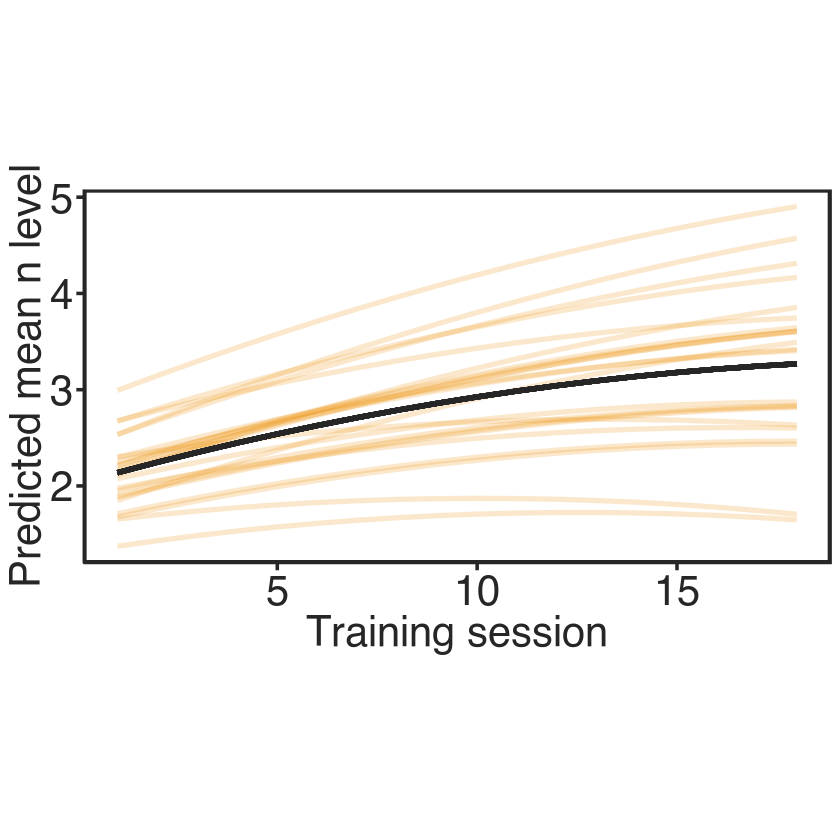

In [57]:
# Place individual predictions and residuals into the dataframe
training_tidy_summary$pred_fl_rl_quadr <- predict(session_quadr)
training_tidy_summary$resid_fl_rl_quadr <- residuals(session_quadr)

# Obtaining predicted scores for prototype
training_tidy_summary$proto_quadr <- predict(session_quadr, level=0)

p <- ggplot(training_tidy_summary, aes(x = Session, y = pred_fl_rl_quadr, group = Subject)) + 
    #geom_point(col = '#ee8c00', alpha = 0.3)+
    geom_line(col = '#ee8c00', alpha = 0.2, size = 1.5) +
    xlab('Training session') + 
    ylab('Predicted mean n level') +
    geom_line(aes(x = Session, y = proto_quadr), color='#262626ff',size=1.5, alpha = 0.5) +
    theme_training
p  

ggsave("figures/Figure_train_prog_pred_nback.pdf", plot = p, width = 10, height = 5, dpi = 300)  

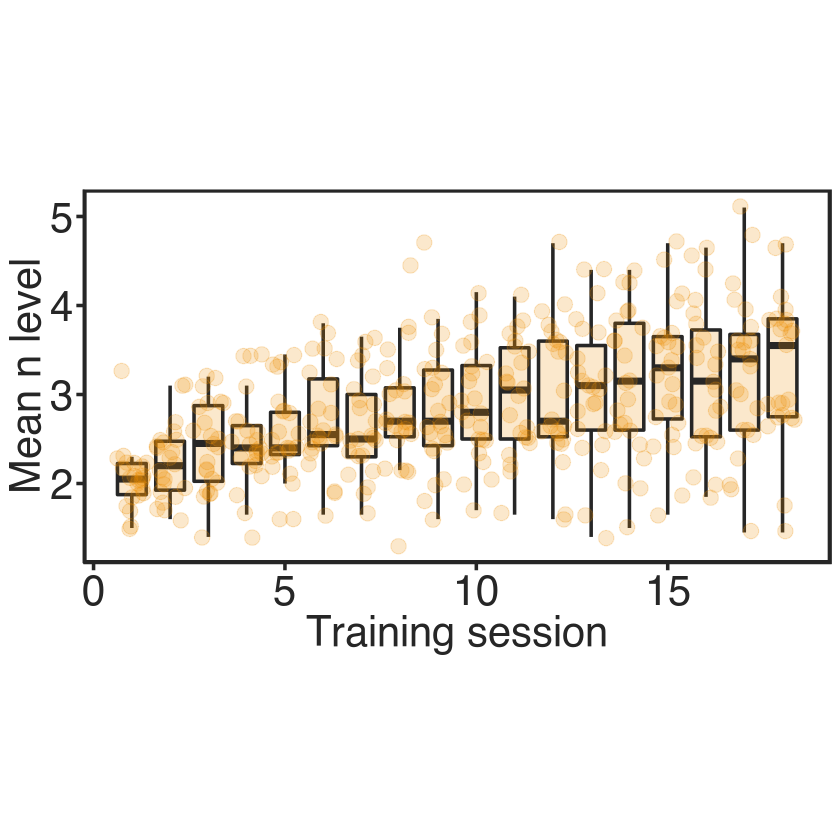

In [42]:
p <- ggplot(training_tidy_summary, aes(x = Session, y = Nback_mean, group = Session)) + 
    geom_boxplot(col = '#262626ff', fill = '#ee8c00', alpha = 0.2, size = 1, outlier.shape = NA)+
    geom_jitter(col = '#ee8c00', alpha = 0.2, size = 4) +
    xlab('Training session') + 
    ylab('Mean n level') +
    theme_training
 p  

ggsave("figures/Figure_train_prog_mean_nback.pdf", plot = p, width = 10, height = 5, dpi = 300)  

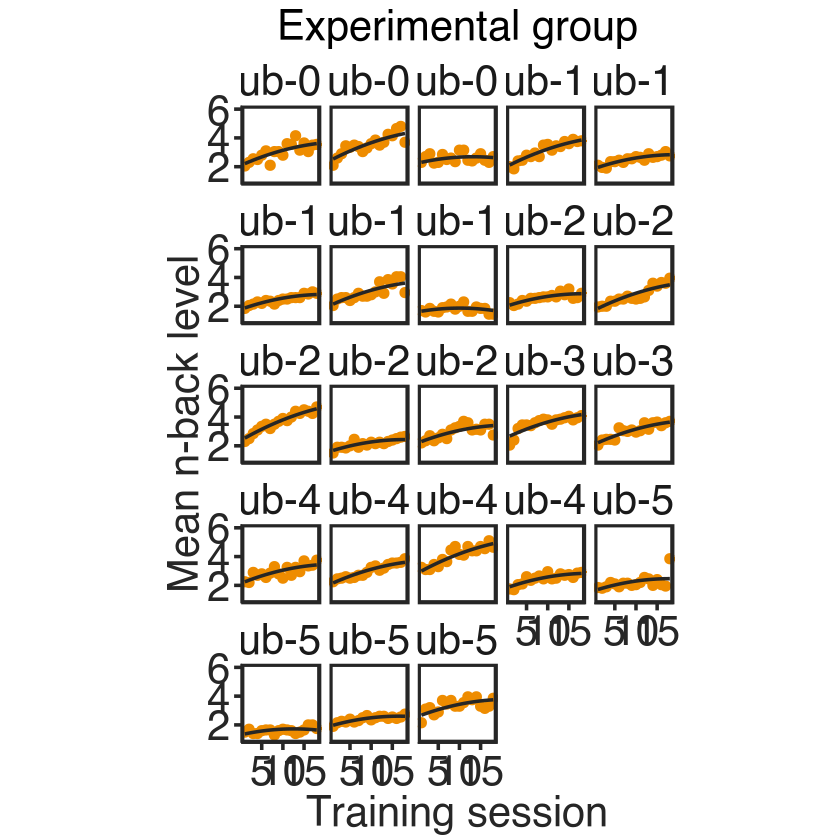

In [43]:
p <- ggplot(training_tidy_summary, aes(x = Session, y = pred_fl_rl_quadr, group = Subject)) + 
    geom_point(aes(x = Session,y = Nback_mean), col = '#ee8c00', alpha = 1, size = 2.5)+
    geom_line(col = '#262626ff', alpha = 1, size = 1) +
    xlab('Training session') + 
    ylab('Mean n-back level') +
    ggtitle("Experimental group") +
    theme_training + 
    ylim(1,6) + 
    facet_wrap(~Subject) +
    theme(aspect.ratio = 1)
 p   

ggsave("figures/Figure_train_prog_indiv.pdf", plot = p, width = 10, height = 15, dpi = 300)  

In [51]:
max_n_level = training_tidy_summary %>% group_by(Subject) %>% summarize(Max_n_lev = max(Nback_max))
write.csv(max_n_level, file = "WM_training_max_level.csv", row.names=FALSE)